In [190]:
import pandas as pd
import numpy as np
import datetime

In [193]:
cols=['semana','edad_','sexo_','comuna', 'tipo_ss_', 'fec_con_','ini_sin_','tip_cas_','pac_hos_','mod_viol','year_' ]
df=pd.read_csv("C:\\Users\\User\\OneDrive\\Documentos\\Proyecto Diplomado\\sivigila_violencia.csv",delimiter=';',usecols=cols)
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_21940\1883675103.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("C:\\Users\\User\\OneDrive\\Documentos\\Proyecto Diplomado\\sivigila_violencia.csv",delimiter=';',usecols=cols)


,semana,edad_,sexo_,comuna,tipo_ss_,fec_con_,ini_sin_,tip_cas_,pac_hos_,mod_viol,year_
0,16,47,M,San Javier,S,20/12/2012,20/11/2012,4,2,3,2013
1,29,14,F,Villa Hermosa,S,8/07/2013,8/07/2013,4,1,4,2013
2,30,8,M,Doce de Octubre,C,21/07/2013,21/07/2013,4,2,3,2013
3,23,7,M,SIN INFORMACION,C,24/05/2013,24/05/2013,4,2,3,2013
4,29,13,M,SIN INFORMACION,C,29/06/2013,26/06/2013,4,1,3,2013


In [192]:
df["comuna"] = (df['comuna']
                            .str.lower()
                            .str.replace("[^a-záéíóúüñ ]","", regex=True)
                            .str.replace(" +"," ", regex=True)
                            .str.strip()
                            .str.title()
                           ) 


In [204]:
df.ini_sin_=pd.to_datetime(df.ini_sin_)
df.fec_con_=pd.to_datetime(df.fec_con_)


In [195]:
messin=list(map(int,df['ini_sin_'].dt.strftime('%m')))
diasin=list(map(int,df['ini_sin_'].dt.strftime('%d')))


In [196]:

df['sem_sin']=list(map(operator.mul, messin, diasin))
df['sem_sin']=df['sem_sin']//7

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

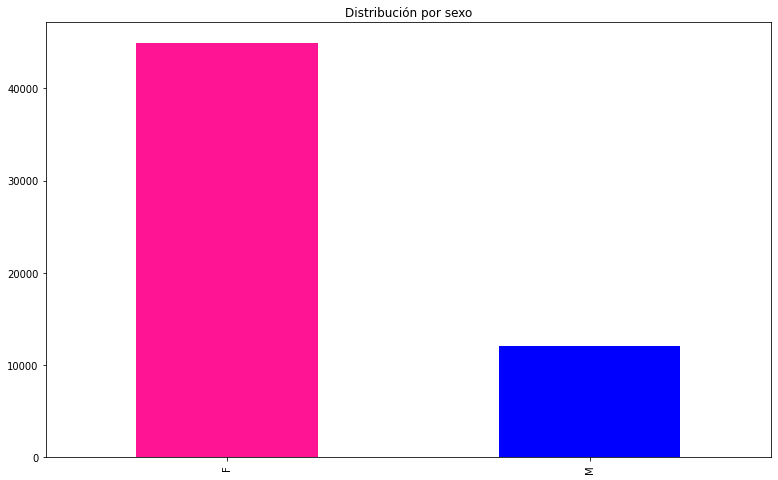

In [198]:
plt.rcParams['figure.figsize'] = [13, 8]
plot = df['sexo_'].value_counts().plot(kind='bar',
                                            title='Distribución por sexo', color=['deeppink','blue'] )

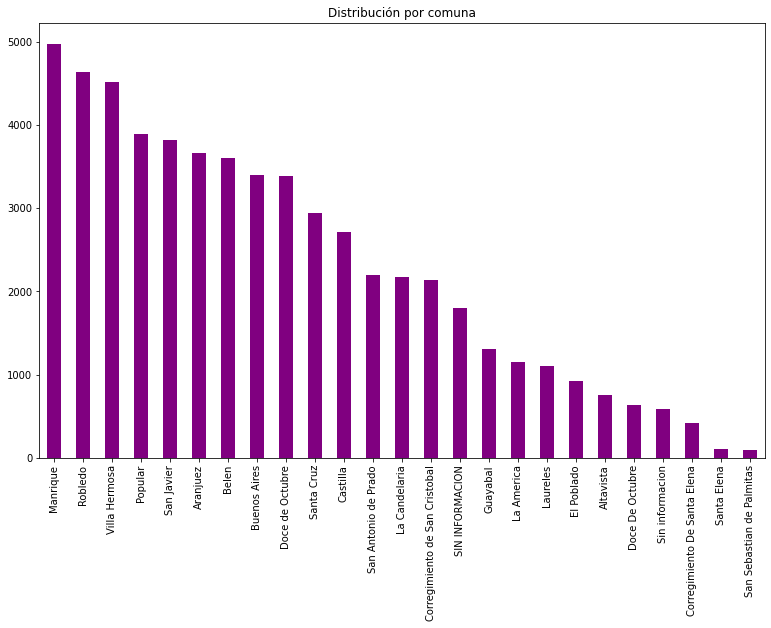

In [199]:
plt.rcParams['figure.figsize'] = [13, 8]
plot = df['comuna'].value_counts().plot(kind='bar',
                                            title='Distribución por comuna', color='purple' )

Text(0.5, 6.79999999999999, 'Semana del inicio de consulta')

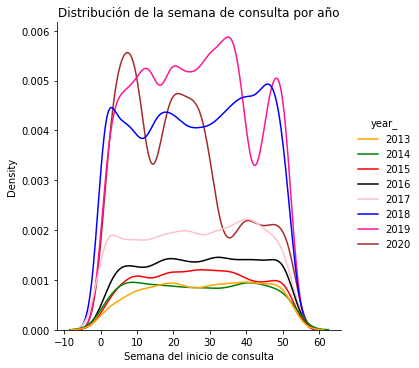

In [202]:

consulta=sns.displot(data=df, x='semana',kind='kde',hue='year_',palette=['orange','green','red','black','pink','blue','deeppink','brown'])
plt.title("Distribución de la semana de consulta por año")
plt.xlabel('Semana del inicio de consulta')


Text(0.5, 6.79999999999999, 'Semana del inicio de síntomas')

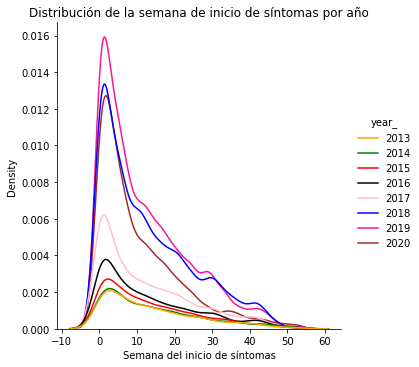

In [203]:
plt.rcParams['figure.figsize'] = [13, 8]
consulta=sns.displot(data=df, x='sem_sin',kind='kde',hue='year_',palette=['orange','green','red','black','pink','blue','deeppink','brown'])
plt.title("Distribución de la semana de inicio de síntomas por año")
plt.xlabel('Semana del inicio de síntomas')
